# Spatial Networks

This library is a short library based on NetworkX and Shapely to address Spatial Networks. Spatial Networks are graphs whose points are located into space. In this library, the actual position and geometry of nodes and edges is important.

It is solely maintained by me (Paul Déchorgnat) and is a first attempt at creating a Python package.

## Data Structures

### Spatial Nodes

In order to force nodes to have a geometrical location, I have created a class that is called `SpatialNode`. This class needs a name (a hashable Python object that is not `None`) and a geometry which should be a `Point` from the `shapely` library (`shapely.geometry.Point`). Note that I have chosen to only consider two dimension `Point`. A three-dimension `SpatialNode` will raise a `ValueError`.

In [1]:
from spatial_networks import SpatialNode
from shapely.geometry import Point

my_node = SpatialNode(
    name="my_node",
    geometry=Point(0, 0)
)

print(my_node)

SpatialNode 'my_node' with coordinates: POINT (0 0)


In the following cells, you will see different errors on the building of a `SpatialNode` object:

In [2]:
# name is not hashable -> TypeError

try:
    my_wrong_node = SpatialNode(
        name=["hello world"],
        geometry=Point(0, 0)
    )
except TypeError as e:
    print(e)

'name' should be a hashable object which is not None. Received a '<class 'list'>' object


In [3]:
# name is None -> TypeError

try:
    my_wrong_node = SpatialNode(
        name=None,
        geometry=Point(0, 0)
    )
except TypeError as e:
    print(e)

'name' should be a hashable object which is not None. Received a '<class 'NoneType'>' object


In [4]:
# geometry is not an instance of Point -> TypeError

try:
    my_wrong_node = SpatialNode(
        name="my_wrong_node",
        geometry=(0, 0)
    )
except TypeError as e:
    print(e)

'geometry' should be a shapely.geometry.Point object. Received a '<class 'tuple'>' object.


In [5]:
# geometry is a three-dimension Point -> ValueError

try:
    my_wrong_node = SpatialNode(
        name="my_wrong_node",
        geometry=Point(0, 0, 0)
    )
except ValueError as e:
    print(e)

'geometry' should be a two-dimension object.


`SpatialNode` is also made to store different values. We simply need to pass them in the constructor:

In [6]:
my_other_node = SpatialNode(
    name="my_other_node",
    geometry=Point(1, 0),
    some_value="a value",
    another_value=[1, 2, 3]
)

print(my_other_node)

SpatialNode 'my_other_node' with coordinates: POINT (1 0)


`SpatialNode` can be used as dictionaries:

In [7]:
print("number of attributes:", len(my_other_node))

print("another_value" in my_other_node)
print("not_a_value" in my_other_node)

for attribute in my_other_node:
    print(attribute, ":", my_other_node[attribute])

number of attributes: 4
True
False
some_value : a value
another_value : [1, 2, 3]
name : my_other_node
geometry : POINT (1 0)


### Spatial Edges

Spatial Edges are to represent the geometry between two nodes. They are represented by the `SpatialEdge` class. A `SpatialEdge` object is built on the same idea as `SpatialNode`. You should specify a `start`, a `stop` and a `geometry` which should be a `LineString` from the shapely library. For now on, `SpatialEdge` are not directed so `start` and `stop` are simply ways to address the two ends of the edge.

Note that `start` and `stop` should be hashable and not `None`. In fact, we will see later that they are supposed to refer to existing `SpatialNode` names if we want to add them to a graph.

In [8]:
from spatial_networks import SpatialEdge
from shapely.geometry import LineString


edge_geometry = LineString([Point(0, 0), Point(1, 0)])

my_spatial_edge = SpatialEdge(
    start="my_node",
    stop="my_other_node",
    geometry=edge_geometry,
    other_value="something"
)

print(my_spatial_edge)

SpatialEdge from node 'my_node' to node 'my_other_node'


Note that `geometry` is actually an optional argument. If not specified, it will be created when added to a graph. It will take the shortest distance between the two nodes.

In [9]:
my_other_spatial_edge = SpatialEdge(
    start="my_node",
    stop="my_other_node"
)

You cannot define define a `key` attribute to a `SpatialEdge`:

In [10]:
try:
    SpatialEdge(
        start="my_node",
        stop="my_other_node",
        key="error"
    )
except ValueError as e:
    print(e)

'key' cannot be an attribute of a SpatialEdge


### Spatial Graphs

The final basic data structure is of course the Graph itself. The `SpatialGraph` class inherits from the `nx.MultiGraph` class, meaning that two nodes can be linked by multiple edges (with different geometries?). `SpatialGraph` are simply created by passing a list of `SpatialNode` and a list of `SpatialEdge` respectively as `nodes` and `edges`:

In [11]:
from spatial_networks import SpatialGraph

my_spatial_graph = SpatialGraph(
    nodes=[my_node, my_other_node],
    edges=[my_spatial_edge]
)

print(my_spatial_graph)

SpatialGraph with 2 nodes and 1 edges


We can draw our graph: you will note that the nodes are correctly located:

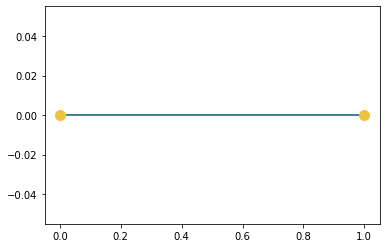

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

my_spatial_graph.draw(include_axis=True)

plt.show()

We can add `SpatialNode` through the `add_node` method or the `add_nodes_from` method.

SpatialGraph with 2 nodes and 1 edges


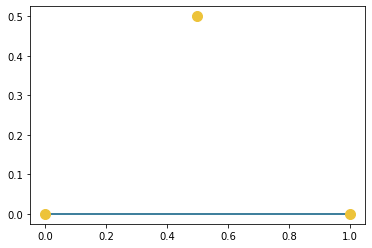

In [13]:
my_third_node = SpatialNode(
    name="third",
    geometry=Point(0.5, 0.5)
)

print(my_spatial_graph)

my_spatial_graph.add_node(my_third_node)

my_spatial_graph.draw(include_axis=True)

plt.show()

We can add edges two:

SpatialGraph with 3 nodes and 3 edges


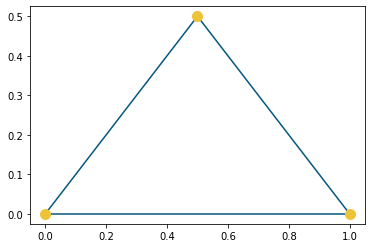

In [14]:
my_spatial_graph.add_edges_from(
    [
        SpatialEdge(start="my_node", stop="third"),
        SpatialEdge(start="third", stop="my_other_node")
    ]
)

print(my_spatial_graph)

my_spatial_graph.add_node(my_third_node)

my_spatial_graph.draw(include_axis=True)

plt.show()

Nodes and Edges data can be accessed through `nodes` and `edges`. As `SpatialGraph` are based on `nx.MultiGraph`, I strongly advice to specify `data=True` and `keys=True` when calling `edges`.

In [15]:
from pprint import pprint

print("SpatialNodes")

pprint(
    list(
        my_spatial_graph.nodes(data=True)
    )
)

print()

print("SpatialEdges")


pprint(
    list(
        my_spatial_graph.edges(data=True, keys=True)
    )
)


SpatialNodes
[('my_node',
  {'geometry': <shapely.geometry.point.Point object at 0x7ff9a44f7b50>,
   'name': 'my_node'}),
 ('my_other_node',
  {'another_value': [1, 2, 3],
   'geometry': <shapely.geometry.point.Point object at 0x7ff964fb31f0>,
   'name': 'my_other_node',
   'some_value': 'a value'}),
 ('third',
  {'geometry': <shapely.geometry.point.Point object at 0x7ff962cc55e0>,
   'name': 'third'})]

SpatialEdges
[('my_node',
  'my_other_node',
  0,
  {'geometry': <shapely.geometry.linestring.LineString object at 0x7ff9a44c6520>,
   'length': 1.0,
   'other_value': 'something',
   'start': 'my_node',
   'stop': 'my_other_node'}),
 ('my_node',
  'third',
  0,
  {'geometry': <shapely.geometry.linestring.LineString object at 0x7ff962bacbb0>,
   'length': 0.7071067811865476,
   'start': 'my_node',
   'stop': 'third'}),
 ('my_other_node',
  'third',
  0,
  {'geometry': <shapely.geometry.linestring.LineString object at 0x7ff964fb3190>,
   'length': 0.7071067811865476,
   'start': 'third'

Note that the length of the edges is computed automatically and stored in `length`.

We can also call the `get_points` and `get_segments` methods to return all the nodes as a `shapely.geometry.MultiPoint` object and all the edges as a `shapely.geometry.MultiLineString` object.

<class 'shapely.geometry.multipoint.MultiPoint'>


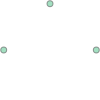

In [16]:
from IPython.display import display

points = my_spatial_graph.get_points()

print(type(points))

display(points)

<class 'shapely.geometry.multilinestring.MultiLineString'>


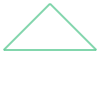

In [17]:
segments = my_spatial_graph.get_segments()

print(type(segments))

display(segments)

We can of course remove nodes or edges:

SpatialGraph with 3 nodes and 2 edges


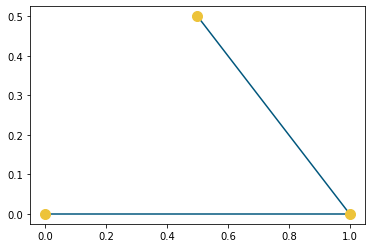

In [18]:
my_spatial_graph.remove_edge(
    ("third", "my_node")
)


print(my_spatial_graph)

my_spatial_graph.add_node(my_third_node)

my_spatial_graph.draw(include_axis=True)

plt.show()

SpatialGraph with 2 nodes and 1 edges


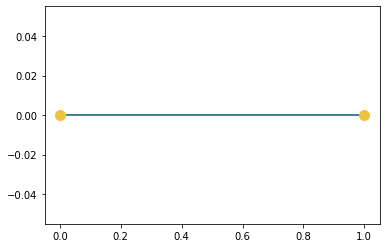

In [19]:
my_spatial_graph.remove_node(
    "third"
)


print(my_spatial_graph)


my_spatial_graph.draw(include_axis=True)

plt.show()

We cannot add a node that is not a `SpatialNode`:

In [20]:
try:
    my_spatial_graph.add_node("a_simple_string")
except TypeError as e:
    print(e)

'node_for_adding' should be a SpatialNode. Received <class 'str'> instead.


We cannot add a `SpatialEdge` that is not refferring to a known node:

In [21]:
try:
    my_spatial_graph.add_edge(SpatialEdge(start="my_node", stop="no_node"))
except ValueError as e:
    print(e)

`edge_to_add['stop']` 'no_node' is not a node of this graph.


Finally, we can have a bit of fun with the geometry of our edges:

SpatialGraph with 2 nodes and 2 edges


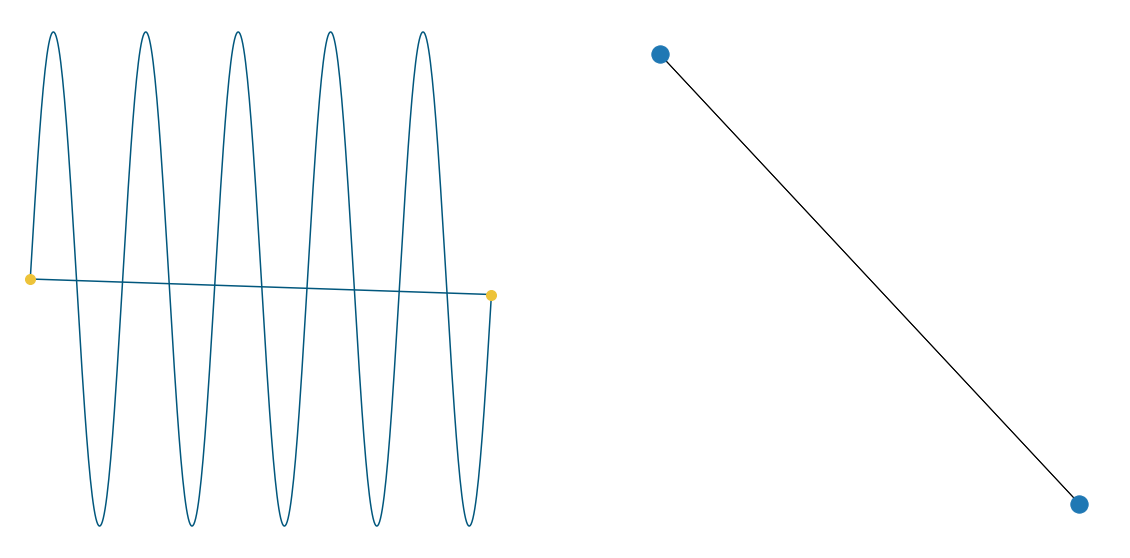

In [22]:
import numpy as np
import networkx as nx

points = [
    Point(i, np.sin(i / 100 * 2 * np.pi)) for i in range(500)
]

nodes = [SpatialNode(name="1", geometry=points[0]), SpatialNode(name="2", geometry=points[-1])]

edges = [
    SpatialEdge(
        start="1",
        stop="2"
    ),
    SpatialEdge(
        start="1",
        stop="2",
        geometry=LineString(points)
    )
]

graph = SpatialGraph(nodes=nodes, edges=edges)
print(graph)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

graph.draw(ax=axes[0])

nx.draw(graph, ax=axes[1])

plt.show()

Note how boring the one on the right is !